This tutorial demonstrates lithology prediction of well logs. A dataframe with missing Gamma Ray log is used to 
demonstrate it. Two dataframes are supplied; traindata.csv (which has the GR values) and traindata1.csv where the Gamma Ray 
values are missing. traindata1 is used to train and make the predictions on the missing section while the values of GR 
in traindata.csv is used to evaluate the predictions

In [1]:
import petroeval as pet
import petroeval.pseudomodes as pds
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
traindata = pd.read_csv('data/traindata.csv')
traindata1 = pd.read_csv('data/traindata1.csv')

In [3]:
traindata1.iloc[:500].isna().sum()#the top 500 values are missing

GR      500
NPHI      0
RHOB      0
SW        0
VSH       0
PHI       0
LFC       0
dtype: int64

In [4]:
traindata1

,GR,NPHI,RHOB,SW,VSH,PHI,LFC
0,NaN,0.4117,2.256416,1.0,0.490442,0.288107,4.0
1,NaN,0.4241,2.259464,1.0,0.521934,0.288435,4.0
2,NaN,0.4307,2.265315,1.0,0.520316,0.284762,4.0
3,NaN,0.4179,2.278895,1.0,0.502234,0.275222,4.0
4,NaN,0.4056,2.286220,1.0,0.500238,0.270614,4.0
...,...,...,...,...,...,...,...
4112,59.1847,0.0873,NaN,NaN,0.122708,NaN,NaN
4113,59.1847,0.0873,NaN,NaN,0.122708,NaN,NaN
4114,59.1847,0.0873,NaN,NaN,0.122708,NaN,NaN
4115,59.1847,0.0873,NaN,NaN,0.122708,NaN,NaN


In [5]:
traindata1 = pet.preprocessing.set_mnemonics(data=traindata1, GR='GR', NPHI='NPHI', RHOB='RHOB', RT='SW')

In [6]:
lithos = pds.PredictLitho(df=traindata, depth_col=None)    # instantiating the prediction lithology class from pseudomodes

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l2: 0.0912305
[400]	valid_0's l2: 0.0380412
[600]	valid_0's l2: 0.0343103
[800]	valid_0's l2: 0.0334657
Early stopping, best iteration is:
[848]	valid_0's l2: 0.03338
The test RMSE is : 0.1827019372363035
The test R2 score is : 0.9996935555310674
None


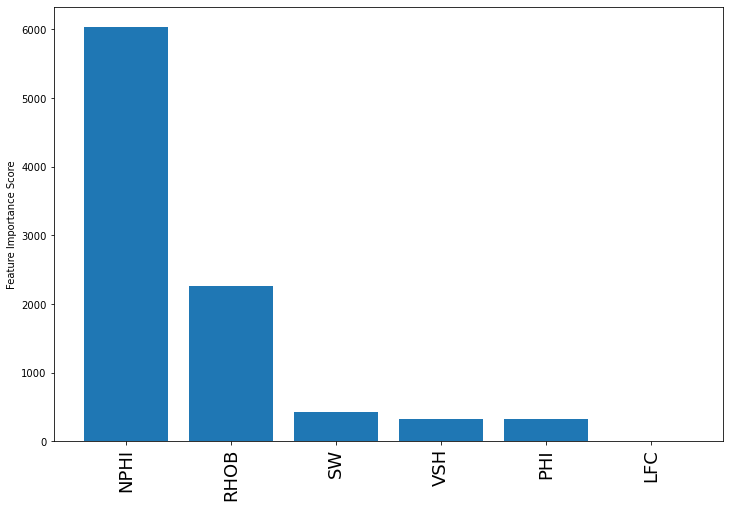

<Figure size 864x576 with 0 Axes>

In [7]:
predictions = lithos.predict(target='GR', start=0, end=500, model='LGB')

In [8]:
import sklearn.metrics as sklm

print(f'R2 score is: {round((sklm.r2_score(traindata.iloc[:500].GR, predictions)), 2) * 100} %')
print(f'RMSE is: {round((sklm.mean_squared_error(traindata.iloc[:500].GR, predictions) ** 0.5), 4)}')

R2 score is: 96.0 %
RMSE is: 3.1506


In [9]:
new_df = traindata.iloc[:500]
new_df['prediction'] = predictions

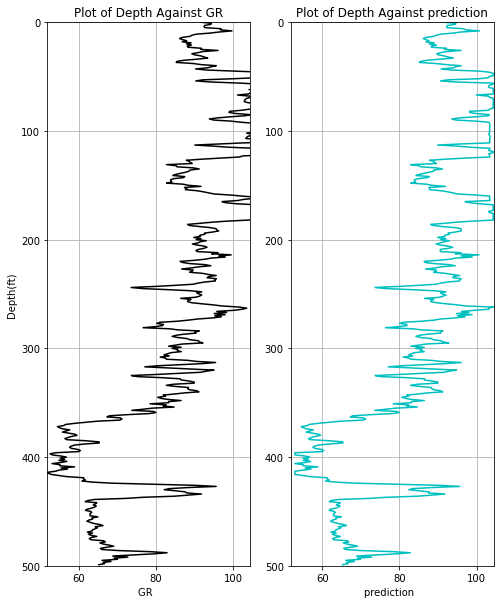

In [10]:
pet.plots.two_plot(logs=new_df, x1='GR', x2='prediction', 
                   top=0, base=500, scale=True)

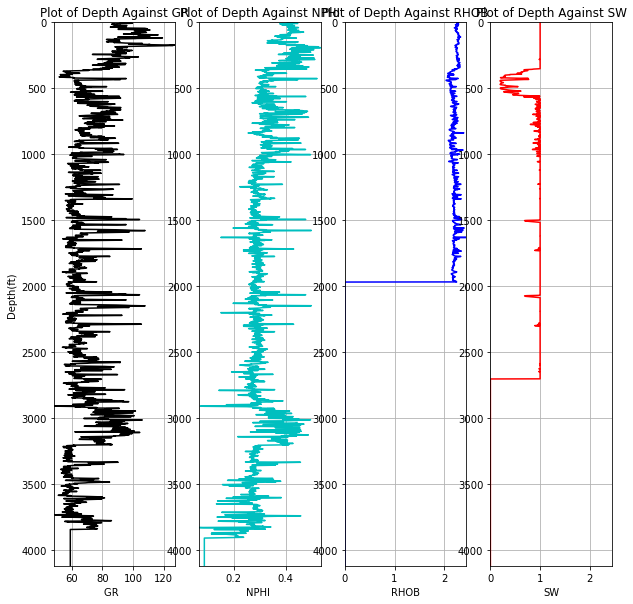

In [11]:
pet.four_plots(traindata, 'GR', 'NPHI', 'RHOB', 'SW', 0, traindata.shape[0])

The very high accuracy is due to the nature of the dataset and how highly correlated the Gamma Ray log is to the other logs supplied. The tutorial has been made in order to avoid data leakage by preparing the input data properly. See the official package documentations for more on how to use the codes: https://petroeval.readthedocs.io/

# LICENSE

The well log labels used for this tutorial are licensed CC-BY-4.0. The well log data used for making this notebook tutorial is licensed as Norwegian License for Open Government Data (NLOD) 2.0. Any publication involving the well log data must cite “Lithofacies data was provided by the FORCE Machine Learning competition with well logs and seismic 2020”. For citation please use: Bormann P., Aursand P., Dilib F., Dischington P., Manral S. 2020. 2020 FORCE Machine Learning Contest.